<a href="https://colab.research.google.com/github/ranjuadhikari14/Crab-AGE-prediction/blob/main/Crab_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np


In [173]:
print("hello world")


hello world


In [174]:
import pandas as pd


In [175]:
df=pd.read_csv("/content/train.csv")

In [176]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [177]:
da=pd.read_csv("/content/CrabAgePrediction.csv")

In [178]:
da

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [179]:
# Evaluation Criteria: Mean Absolute Error (MAE),

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context('paper')
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context('paper')#sets the size of the charts
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,KFold, cross_val_score

In [182]:
df = pd.read_csv('/content/train.csv')
df_org = pd.read_csv('/content/CrabAgePrediction.csv')


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [184]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [185]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [186]:
df.drop('id', axis=1, inplace=True)

In [187]:

df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [188]:
df_fin = pd.concat([df, df_org])

In [189]:



df_fin.reset_index(drop=True, inplace=True)

In [190]:
df_fin

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
77939,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
77940,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
77941,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
77942,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [191]:
df_fin.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Weight,0
Shucked Weight,0
Viscera Weight,0
Shell Weight,0
Age,0


In [192]:
df_fin.drop_duplicates(inplace=True)

In [193]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77944 entries, 0 to 77943
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


In [194]:
# Exploratory Data Analysis

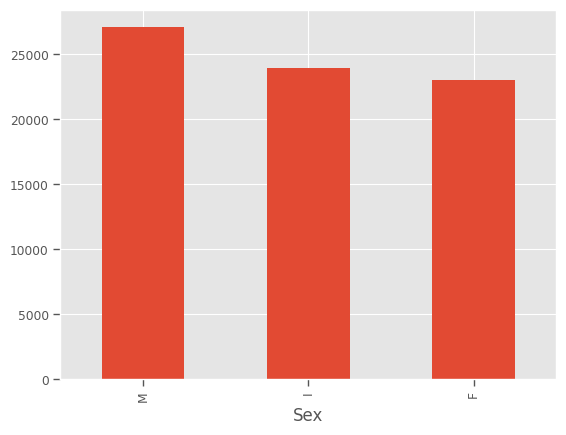

<Figure size 1000x800 with 0 Axes>

In [195]:
df['Sex'].value_counts().plot.bar()
plt.figure(figsize=(10,8))
plt.show()

<Axes: ylabel='Frequency'>

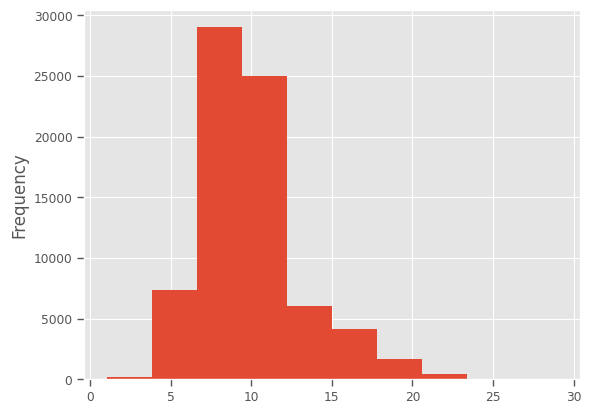

In [196]:
df['Age'].plot.hist()

In [197]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77944 entries, 0 to 77943
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.4+ MB


<Axes: >

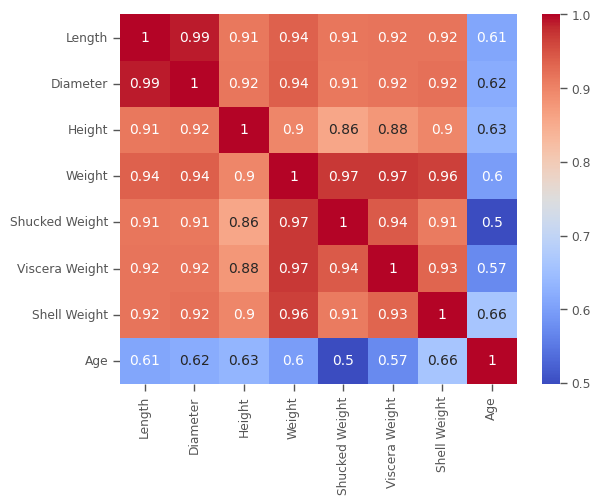

In [198]:
sns.heatmap(df_fin.drop("Sex",axis=1).corr(),annot=True,cmap='coolwarm')

<Axes: >

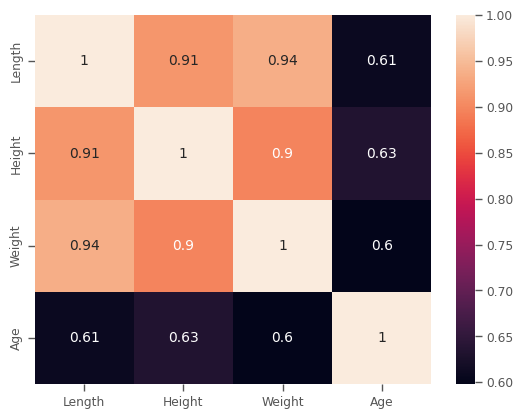

In [199]:
sns.heatmap(df_fin.drop(['Sex','Diameter','Shucked Weight','Viscera Weight','Shell Weight'],axis=1).corr(), annot=True)

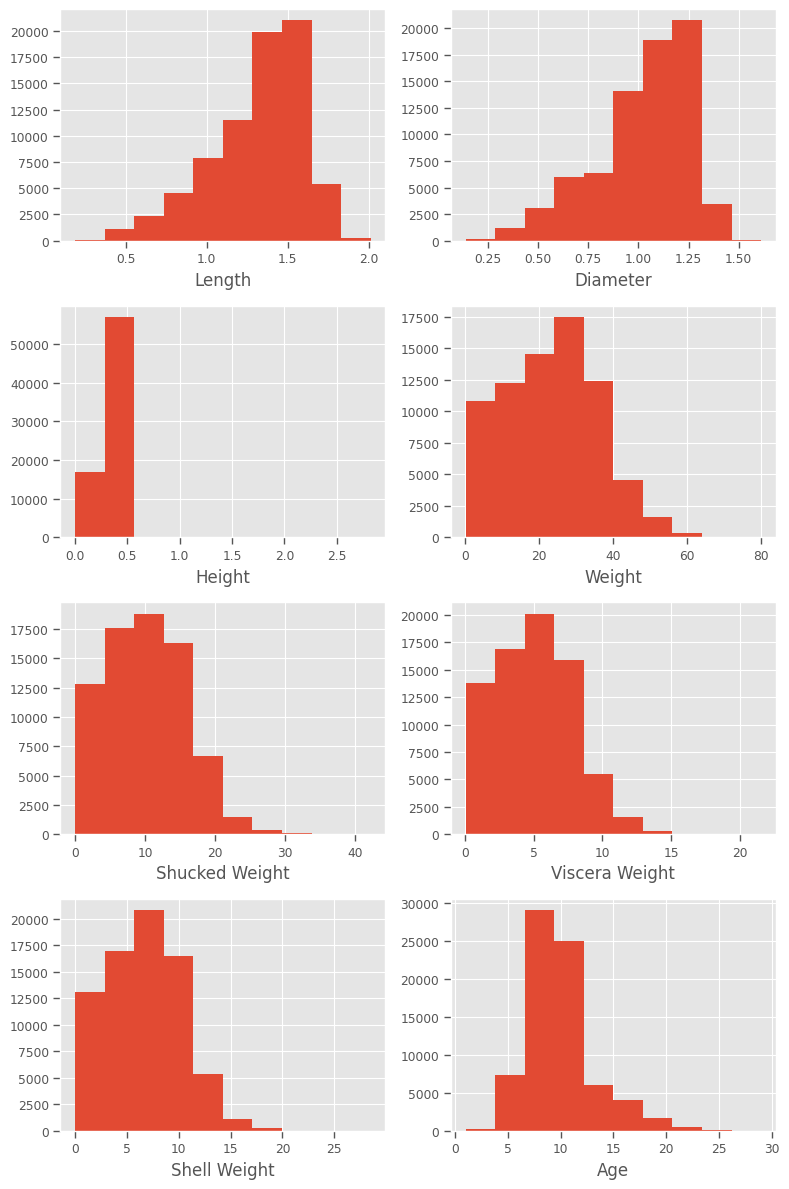

In [200]:
num_rows=4
num_columns=4
fig_width=8
fig_height=3*num_rows
fig,axes=plt.subplots(num_rows,2,figsize=(fig_width,fig_height))
for i ,column1 in enumerate (df.drop('Sex',axis=1).columns):
    row = i // 2
    col = i % 2
    axes[row, col].hist(df[column1])
    axes[row, col].set_xlabel(column1)
if num_columns % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])
plt.tight_layout()
plt.show()



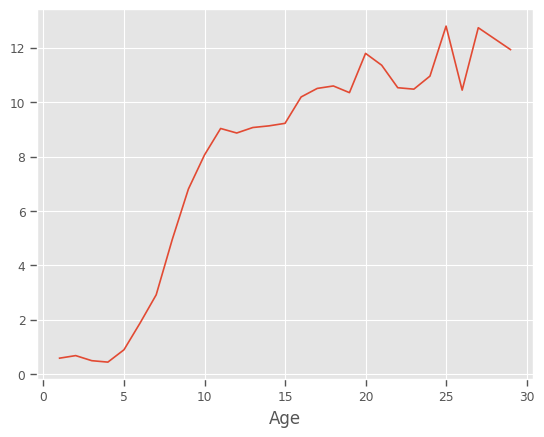

In [201]:
df['Shell Weight'].groupby(df['Age']).mean().plot.line()
plt.show()


In [202]:
df['Age'].groupby(df['Sex']).mean()

,Age
Sex,
F,11.341547
I,7.599073
M,10.895953


<Axes: xlabel='Sex'>

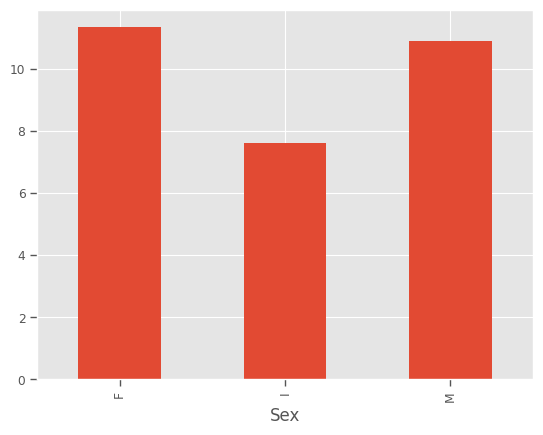

In [203]:
df['Age'].groupby(df['Sex']).mean().plot.bar()

In [204]:
# This means shell weight continious to grow with age

In [205]:
df['Shell Weight'].groupby(df['Age']).mean()

,Shell Weight
Age,
1,0.582937
2,0.677351
3,0.490422
4,0.437707
5,0.892284
6,1.877023
7,2.914198
8,4.953074
9,6.804733


In [206]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [207]:
df_fin

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
77939,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
77940,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
77941,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
77942,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [208]:
df_fin.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [209]:
from sklearn.preprocessing import MinMaxScaler
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_fin[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']).merge(df_fin['Age'], on=df_fin.index)

In [210]:
df_norm.drop('key_0',axis=1, inplace=True)

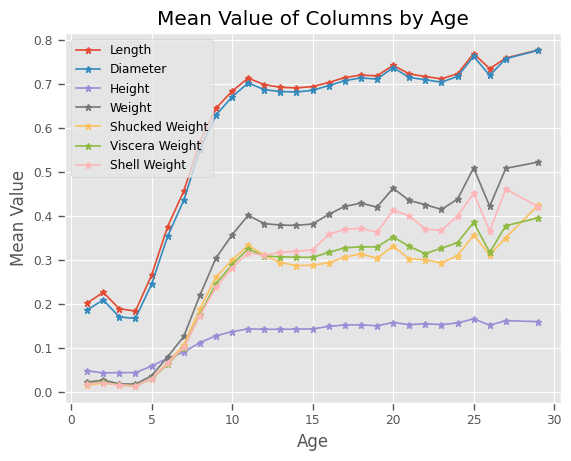

In [211]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').mean()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Mean Value of Columns by Age')

# Show the plot
plt.show()

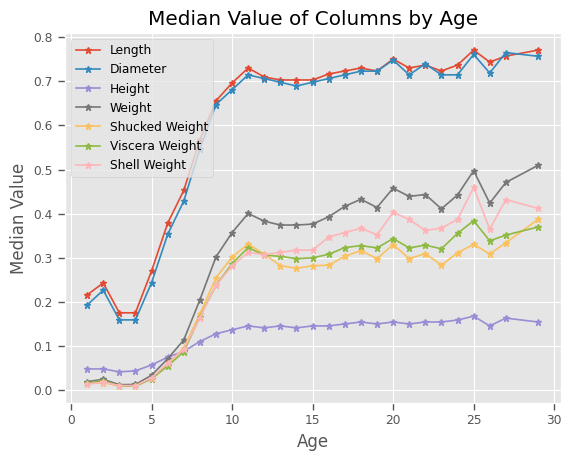

In [212]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').median()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Value')
plt.title('Median Value of Columns by Age')

# Show the plot
plt.show()

In [213]:
df['Age'].groupby(df['Sex']).mean()

,Age
Sex,
F,11.341547
I,7.599073
M,10.895953


In [214]:
#Lets first try with normal encoding

In [215]:
df_fin = pd.get_dummies(df_fin)

In [216]:
df_fin

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
77939,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,True,False,False
77940,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,True,False,False
77941,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,False,True,False
77942,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,False,True,False


In [217]:
df_fin.columns

Index(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [218]:
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_fin[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']).merge(df_fin[['Age', 'Sex_F', 'Sex_I', 'Sex_M']], on=df_fin.index)

In [219]:
df_norm

,key_0,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,0.722973,0.697479,0.132743,0.361254,0.301278,0.308097,0.291978,9,False,True,False
1,1,0.493243,0.462185,0.097345,0.129449,0.106590,0.107307,0.118087,8,False,True,False
2,2,0.648649,0.655462,0.132743,0.308837,0.268325,0.257406,0.232686,9,False,False,True
3,3,0.817568,0.857143,0.176991,0.632194,0.482179,0.509843,0.525660,11,True,False,False
4,4,0.574324,0.588235,0.119469,0.290243,0.283457,0.208690,0.207773,8,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
77939,77939,0.689189,0.672269,0.115044,0.309368,0.275723,0.271231,0.222720,8,True,False,False
77940,77940,0.736486,0.722689,0.154867,0.429786,0.365837,0.332456,0.342302,10,True,False,False
77941,77941,0.236486,0.218487,0.057522,0.024438,0.017485,0.023700,0.020927,5,False,True,False
77942,77942,0.472973,0.428571,0.092920,0.128564,0.106254,0.107966,0.103139,6,False,True,False


In [221]:
df_norm.drop('key_0', axis=1, inplace=True)

In [222]:
df_norm

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.722973,0.697479,0.132743,0.361254,0.301278,0.308097,0.291978,9,False,True,False
1,0.493243,0.462185,0.097345,0.129449,0.106590,0.107307,0.118087,8,False,True,False
2,0.648649,0.655462,0.132743,0.308837,0.268325,0.257406,0.232686,9,False,False,True
3,0.817568,0.857143,0.176991,0.632194,0.482179,0.509843,0.525660,11,True,False,False
4,0.574324,0.588235,0.119469,0.290243,0.283457,0.208690,0.207773,8,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
77939,0.689189,0.672269,0.115044,0.309368,0.275723,0.271231,0.222720,8,True,False,False
77940,0.736486,0.722689,0.154867,0.429786,0.365837,0.332456,0.342302,10,True,False,False
77941,0.236486,0.218487,0.057522,0.024438,0.017485,0.023700,0.020927,5,False,True,False
77942,0.472973,0.428571,0.092920,0.128564,0.106254,0.107966,0.103139,6,False,True,False
